# Үй жұмысы: Palmer Penguins деректер жинағына EDA және Feature Engineering

**Тақырыбы:** Деректерді зерттеу, тазарту, визуализациялау және модельдеуге дайындау.

**Мақсаты:**
Студент осы жұмысты орындау арқылы Машиналық оқыту жобасының толық циклін қамтитын келесі дағдыларды меңгеруі керек:

1.  **Деректерді тазарту:** Бос мәндермен (Missing Values) және дубликаттармен жұмыс.
2.  **Ауытқуларды өңдеу:** Boxplot және IQR әдісі арқылы outliers-ті анықтау.
3.  **Визуализация:** Matplotlib және Seaborn көмегімен деректердің таралуын және корреляциясын зерттеу.
4.  **Feature Engineering:** Бар деректерден жаңа пайдалы белгілерді жасау.
5.  **Кодтау (Encoding):** Санаттық айнымалыларды (`sex`, `island`, `species`) сандық форматқа ауыстыру.
6.  **Шкалалау (Scaling):** Сандық деректерді бір масштабқа келтіру.

**Дереккөз:** `seaborn` кітапханасындағы кіріктірілген "penguins" деректер жинағы.

-----

## 1\. Кітапханаларды және деректерді жүктеу

Алдымен қажетті кітапханаларды импорттап, деректер жинағын жүктейміз.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Визуализация параметрлерін орнату
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Деректер жинағын жүктеу
df = sns.load_dataset('penguins')

# Алғашқы 5 жолды және деректердің өлшемін шығару
print(f"Деректер өлшемі: {df.shape}")
df.head()

Деректер өлшемі: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


-----

## 2\. Деректерді шолу және Тазарту (Data Cleaning)

Деректерді талдамас бұрын, олардың сапасын тексеріп, бос мәндерден тазартуымыз керек.

**Тапсырма:**

1.  `info()` әдісін қолданып, деректер типін тексеріңіз.
2.  Әр бағанда қанша бос мән (NaN) бар екенін анықтаңыз.
3.  **Стратегия:**
      * Сандық бағандардағы (`bill_length_mm`, `body_mass_g` т.б.) бос мәндерді **медианамен** толтырыңыз.
      * Санаттық бағандардағы (`sex`) бос мәндерді ең жиі кездесетін мәнмен (**mode**) толтырыңыз.

<!-- end list -->

In [6]:
# 1. Деректер туралы ақпарат (info)
# TODO: Кодыңызды осында жазыңыз
df.info()
# 2. Бос мәндер санын тексеру
# TODO: Кодыңызды осында жазыңыз
print(df.isnull().sum())
# 3. Бос мәндерді толтыру
# Сандық бағандар үшін (цикл немесе жеке-жеке fillna қолданыңыз)
# TODO: Кодыңызды осында жазыңыз
num_fill_cols = df.select_dtypes(include=[np.number]).columns
for col in num_fill_cols:
    df[col] = df[col].fillna(df[col].median())
# 'sex' бағаны үшін (mode қолданыңыз)
# TODO: Кодыңызды осында жазыңыз
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
# Тексеру: Бос мәндер қалмағанына көз жеткізіңіз
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


-----

## 3\. Ауытқуларды анықтау және өңдеу (Outlier Handling)

Кейде деректерде қате енгізілген немесе тым ерекше мәндер болады. Біз оларды IQR (Interquartile Range) әдісімен тазалаймыз.

**Тапсырма:**

1.  `flipper_length_mm` (қанат ұзындығы) бағаны үшін **Boxplot** сызыңыз.
2.  Осы баған үшін **IQR** есептеңіз (Q3 - Q1).
3.  Төменгі (lower bound) және жоғарғы (upper bound) шекті анықтаңыз.
4.  Осы шектен шығатын мәндерді алып тастаңыз (сүзгілеу).

<!-- end list -->

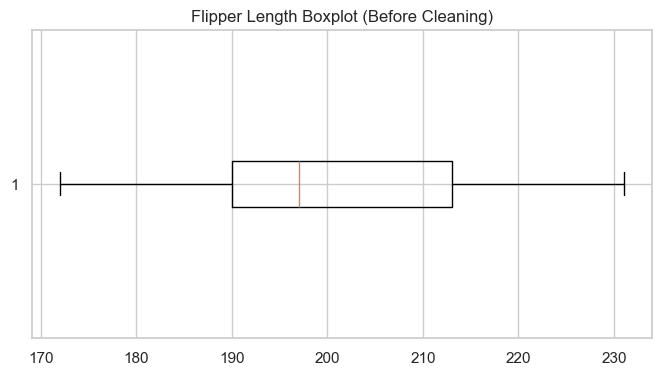

Тазартылғаннан кейінгі деректер өлшемі: (344, 7)


In [7]:
# 1. Boxplot салу
plt.figure(figsize=(8, 4))
# TODO: Seaborn boxplot функциясын қолданыңыз
plt.boxplot(df['flipper_length_mm'].dropna(), vert=False)
plt.title('Flipper Length Boxplot (Before Cleaning)')
plt.show()

# 2. IQR және шектік мәндерді есептеу
# TODO: Q1 және Q3 есептеңіз
# TODO: IQR есептеңіз
# TODO: lower_bound және upper_bound есептеңіз
Q1 = df['flipper_length_mm'].quantile(0.25)
Q3 = df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Ауытқуларды алып тастау
# TODO: df айнымалысын жаңартып, тек шектік мәндер арасындағы деректерді қалдырыңыз
df = df[(df['flipper_length_mm'] >= lower_bound) & (df['flipper_length_mm'] <= upper_bound)].copy()

print(f"Тазартылғаннан кейінгі деректер өлшемі: {df.shape}")

-----

## 4\. Визуализация (EDA)

Енді таза деректермен жұмыс істейміз. Графиктер арқылы заңдылықтарды іздеңіз.

**Тапсырма:**

1.  **Гистограмма:** `body_mass_g` (салмақ) таралуын көрсетіңіз.
2.  **Нүктелік диаграмма (Scatter Plot):** `bill_length_mm` (тұмсық ұзындығы) мен `bill_depth_mm` (тұмсық тереңдігі) арасындағы байланысты көрсетіңіз. Түрлерді (`species`) түс (`hue`) арқылы ажыратыңыз.
3.  **Жылу картасы (Heatmap):** Барлық сандық айнымалылар арасындағы корреляция матрицасын құрыңыз және визуализациялаңыз.

<!-- end list -->

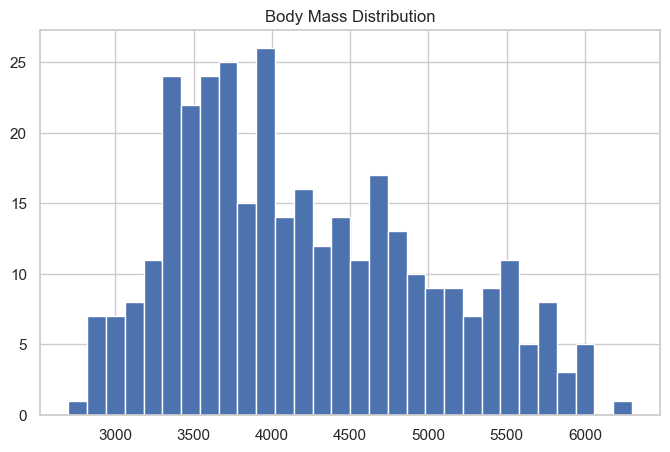

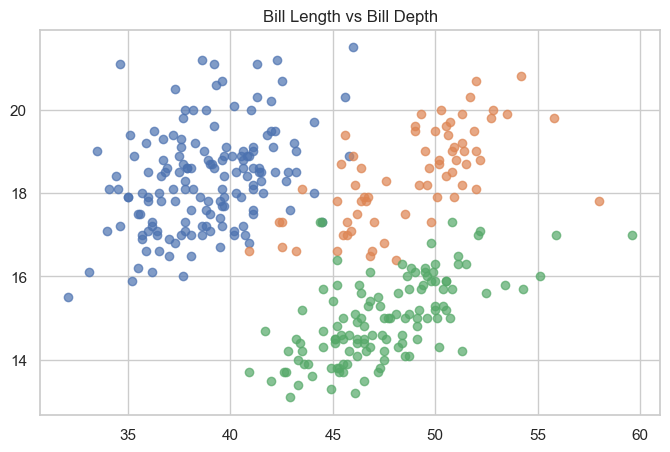

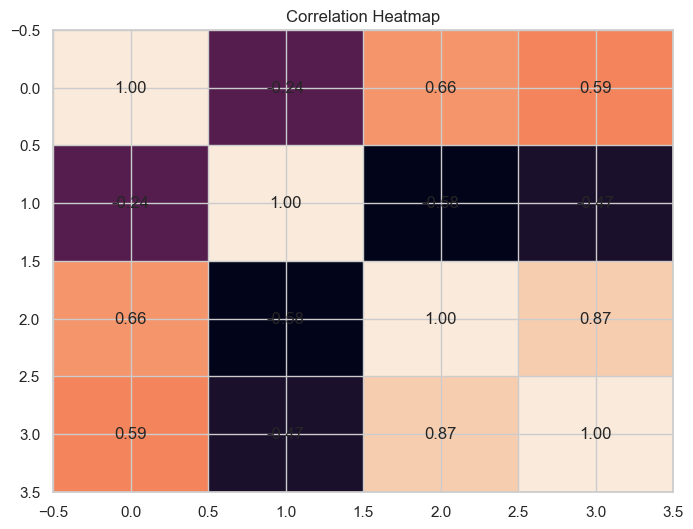

In [9]:
# 1. Салмақтың таралуы (Histogram)
plt.figure(figsize=(8, 5))
# TODO: sns.histplot қолданыңыз
plt.hist(df['body_mass_g'].dropna(), bins=30)
plt.title('Body Mass Distribution')
plt.show()

# 2. Scatterplot: Тұмсық ұзындығы vs Тереңдігі
plt.figure(figsize=(8, 5))
# TODO: sns.scatterplot қолданыңыз (hue='species')
for sp, g in df.groupby('species'):
    plt.scatter(g['bill_length_mm'], g['bill_depth_mm'], label=sp, alpha=0.7)
plt.title('Bill Length vs Bill Depth')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
# TODO: Тек сандық бағандарды таңдап, correlation matrix жасаңыз
# TODO: sns.heatmap арқылы салыңыз
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.imshow(corr, aspect='auto')
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center')
plt.title('Correlation Heatmap')
plt.show()

-----

## 5\. Feature Engineering

Модель жақсы жұмыс істеуі үшін кейде жаңа белгілер (features) ойлап табу керек.

**Тапсырма:**

  * `bill_ratio` атты жаңа баған қосыңыз. Ол тұмсық ұзындығының тереңдігіне қатынасын (`bill_length_mm / bill_depth_mm`) білдіреді.

<!-- end list -->

In [22]:
# Жаңа feature жасау
# TODO: df['bill_ratio'] = ...
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']
# Алғашқы 5 жолды тексеру
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
0,0,Torgersen,39.10,18.7,181.0,3750.0,Male,2.090909
1,0,Torgersen,39.50,17.4,186.0,3800.0,Female,2.270115
2,0,Torgersen,40.30,18.0,195.0,3250.0,Female,2.238889
3,0,Torgersen,44.45,17.3,197.0,4050.0,Male,2.569364
4,0,Torgersen,36.70,19.3,193.0,3450.0,Female,1.901554


-----

## 6\. Санаттық белгілерді кодтау (Encoding)

Компьютер сөздерді түсінбейді, сондықтан `island`, `sex`, `species` сияқты сөздік бағандарды сандарға айналдырамыз.

**Тапсырма:**

1.  `species` (біз болжайтын нысана) үшін **Label Encoding** қолданыңыз (0, 1, 2 қылып өзгертеді).
2.  `island` және `sex` үшін **One-Hot Encoding** (`pd.get_dummies`) қолданыңыз. `drop_first=True` параметрін ұмытпаңыз.

<!-- end list -->

In [10]:
# 1. Label Encoding (species)
le = LabelEncoder()
# TODO: df['species'] бағанын трансформациялаңыз
df['species'] = le.fit_transform(df['species'])
# 2. One-Hot Encoding (island, sex)
# TODO: pd.get_dummies қолданып, нәтижені df_encoded айнымалысына сақтаңыз
df_encoded = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)
# Нәтижені көру
df_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,0,39.10,18.7,181.0,3750.0,False,True,True
1,0,39.50,17.4,186.0,3800.0,False,True,False
2,0,40.30,18.0,195.0,3250.0,False,True,False
3,0,44.45,17.3,197.0,4050.0,False,True,True
4,0,36.70,19.3,193.0,3450.0,False,True,False


-----

## 7\. Шкалалау (Scaling)

Соңғы қадам – сандық деректерді бір өлшемге келтіру. Мысалы, салмақ 5000 грамм болса, тұмсық ұзындығы 50 мм. Бұл айырмашылық модельге кедергі келтіруі мүмкін.

**Тапсырма:**

  * `StandardScaler` көмегімен барлық сандық белгілерді (`bill_length_mm`, `body_mass_g`, `bill_ratio` т.б.) шкалалаңыз.

<!-- end list -->

In [24]:
scaler = StandardScaler()

# Шкалаланатын бағандар тізімі
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Шкалалауды жүзеге асыру
# TODO: fit_transform қолданыңыз және df_encoded ішіндегі бағандарды жаңартыңыз
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
# Қорытынды нәтижені тексеру
df_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,0,-0.887622,0.787289,-1.420541,-0.564625,False,True,True
1,0,-0.814037,0.126114,-1.063485,-0.502010,False,True,False
2,0,-0.666866,0.431272,-0.420786,-1.190773,False,True,False
3,0,0.096581,0.075255,-0.277964,-0.188936,False,True,True
4,0,-1.329133,1.092447,-0.563608,-0.940314,False,True,False


-----

## Қорытынды

**Талдау нәтижесі бойынша қысқаша жауап жазыңыз:**

1.  `body_mass_g` (салмақ) пен `flipper_length_mm` (қанат ұзындығы) арасында қандай корреляция бар (оң ма, теріс пе, күшті ме)?
2.  Heatmap-қа қарап айтыңызшы.